In [3]:
### Задание 2
import numpy as np
import pandas as pd

In [4]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler

In [5]:
boston = load_boston()
data = boston.data
target = boston.target
feature_names = boston.feature_names

In [6]:
X = pd.DataFrame(data, columns=feature_names)
Y = pd.DataFrame(target, columns=['price'])

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

In [11]:
model.fit(X_train, Y_train.values[:,0])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [12]:
Y_pred = model.predict(X_test)

In [13]:
check = pd.DataFrame({
    'test': Y_test.values.flatten(),
    'pred': Y_pred
})
check

,test,pred
0,23.6,22.846138
1,32.4,31.156114
2,13.6,16.297226
3,22.8,23.821036
4,16.1,17.212148
5,20.0,21.820092
6,17.8,19.866369
7,14.0,14.759938
8,19.6,21.235224
9,16.8,20.883103


In [14]:
from sklearn.metrics import r2_score

In [15]:
R2 = r2_score(Y_test, Y_pred)
R2

0.8749965273218174

In [16]:
### Результат R2 модели с линейной регрессией - 0.711226005748496

In [17]:
### Задание 3

In [18]:
import matplotlib.pyplot as plt

In [19]:
model.feature_importances_

array([0.03211748, 0.00154999, 0.0070941 , 0.0011488 , 0.01436832,
       0.40270459, 0.01424477, 0.06403265, 0.00496762, 0.01169177,
       0.01808961, 0.0123114 , 0.41567892])

In [38]:
imp_df = pd.DataFrame({
    'Feature': X_train.columns.values,
    'Importance': model.feature_importances_
})
imp_df

,Feature,Importance
0,CRIM,0.032117
1,ZN,0.001550
2,INDUS,0.007094
3,CHAS,0.001149
4,NOX,0.014368
5,RM,0.402705
6,AGE,0.014245
7,DIS,0.064033
8,RAD,0.004968
9,TAX,0.011692


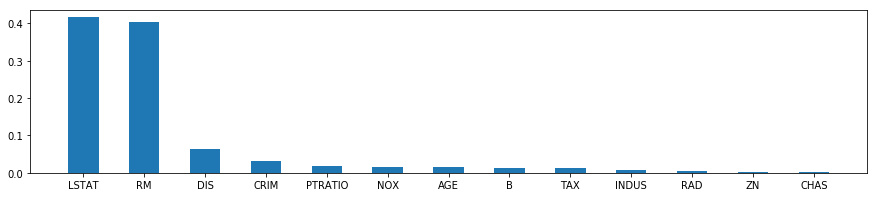

In [37]:
imp_df = imp_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(15, 3))
plt.bar(imp_df['Feature'].values, imp_df['Importance'].values, align='center', width=0.5)
plt.show()